In [2]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from matplotlib.pyplot import imshow

## Loading the Image

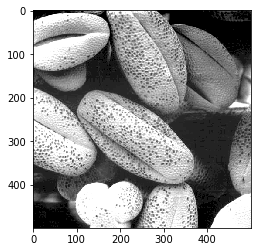

In [3]:
img = Image.open('hist.tif')
imshow(img, cmap = 'gray')

## Plotting the Histogram

### Before Equalization

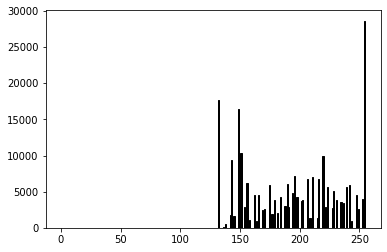

In [4]:
array_image = np.asarray(img)
plt.hist(array_image.ravel(),bins=256,range=(0,255),fc='k',ec='k')
plt.show()

In [5]:
gray_image = img.convert('L')
gray_arr = np.asarray(gray_image)

In [8]:
levels = [0]*256
for i in range(0,len(gray_arr)):
    for j in range(0,len(gray_arr[0])):
        levels[gray_arr[i][j]]+=1


p = [0]*256
for i in range(0,256):
    p[i] = levels[i]/float(size)

cdf = [0]*256
temp = 0
for i in range(0,256):
    cdf[i] = temp + p[i]
    temp =cdf[i]

after_hist = np.zeros(shape=(len(gray_arr),len(gray_arr[0])))

tcdf = [0]*256
for i in range(0,256):
    tcdf[i] = round(i * cdf[i])

for i in range(0,len(gray_arr)):
    for j in range(0,len(gray_arr[0])):
        after_hist[i][j] = tcdf[gray_arr[i][j]]

equalized = Image.fromarray(after_hist)
plt.imshow(equalized,cmap='gray')
plt.show()



TypeError: float() argument must be a string or a number, not 'list'

### After Equalization

In [7]:
array_image = np.asarray(equalized)
plt.hist(array_image.ravel(),bins=256,range=(0,255),fc='k',ec='k');

NameError: name 'equalized' is not defined

### Does the equalized histogram has a uniform distribution ?

##### Yes, it does have uniform distribution because the job of the algorithm is to different the pixels intensity values normally